#### Assumptions made/issues/observations found, please review and advise: 
      
####    Production dataset - Require review and input
      -Duplicate values found in original production dataset.
      


     

# Import Libraries

In [ ]:
!pip install sweetviz

     |████████████████████████████████| 327kB 5.1MB/s eta 0:00:01
     |████████████████████████████████| 71kB 5.9MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import pandas as pd
import numpy as np
import sweetviz as sv

## Get the data

In [ ]:

from google.colab import files

uploaded = files.upload()

Saving WellProduction.csv to WellProduction (1).csv


In [ ]:
## add list of datecolumns to parse_date to ensure datetime datatypes
## assumed 'Not Applicable' values are NA values

import io

well_production = pd.read_csv(io.StringIO(uploaded['WellProduction.csv'].decode("utf-8")),parse_dates=['ProdPeriod'], index_col=False)

In [ ]:
display(well_production.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961054 entries, 0 to 961053
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   EPAssetsId        961054 non-null  int64         
 1   ProdPeriod        961054 non-null  datetime64[ns]
 2   ProdType          961054 non-null  object        
 3   Volume            961054 non-null  float64       
 4   WellHeader.Match  961054 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 36.7+ MB


None

In [ ]:
# change ProdType and ActivityType columns from object to category datatype
well_production['ProdType'] = well_production['ProdType'].astype('category')


## Seewtviz Magic

In [ ]:
well_production=well_production.iloc[:,0:4]

In [ ]:
well_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961054 entries, 0 to 961053
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   EPAssetsId  961054 non-null  int64         
 1   ProdPeriod  961054 non-null  datetime64[ns]
 2   ProdType    961054 non-null  category      
 3   Volume      961054 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 22.9 MB


In [ ]:
 wp= sv.analyze(well_production)

:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:20  -> (00:00 left)


Creating Associations graph... DONE!


In [ ]:
wp.show_html('wells_production.html')

Report wells_production.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# Modified Dataframes

In [ ]:
## add year and month column to the well production data 

well_production['Year'] = well_production['ProdPeriod'].dt.year

well_production['Month'] = well_production['ProdPeriod'].dt.month

well_production['Month_Name'] = well_production['ProdPeriod'].dt.month_name()

## Check for duplicates

In [ ]:
# check for number of duplicates in the original production dataframe before pivoting
def check_duplicates_in_wellproduction(ProdType):
    x = well_production[well_production['ProdType']== ProdType]
    y = x[x.duplicated(subset=['EPAssetsId', "ProdPeriod"])]
    print(y['EPAssetsId'].nunique())

duplicate_values_for_gas_production = check_duplicates_in_wellproduction('Gas Production (MMcf)')
print('\n')
duplicate_values_for_prod_hrs = check_duplicates_in_wellproduction('Production Hours')
print('\n')
duplicate_values_for_oil_production = check_duplicates_in_wellproduction('Oil Production (Bbls)')
print('\n')
duplicate_values_for_water_production = check_duplicates_in_wellproduction('Water Production (Bbls)')
print('\n')
duplicate_values_for_condensate_production = check_duplicates_in_wellproduction('Condensate Production (Bbls)')

317


440


378


281


0


In [ ]:
# check a duplicate value in the original production dataframe before pivoting

well_production[(well_production['EPAssetsId']== 1164075) & (well_production['ProdType']== 'Production Hours')].sort_values(by=['ProdPeriod'])

,EPAssetsId,ProdPeriod,ProdType,Volume,Year,Month,Month_Name
192637,1164075,2017-05-31,Production Hours,196.0,2017,5,May
87325,1164075,2017-06-30,Production Hours,720.0,2017,6,June
59149,1164075,2017-07-31,Production Hours,744.0,2017,7,July
61413,1164075,2017-08-31,Production Hours,744.0,2017,8,August
90952,1164075,2017-09-30,Production Hours,720.0,2017,9,September
177702,1164075,2017-10-31,Production Hours,456.0,2017,10,October
177391,1164075,2017-10-31,Production Hours,266.0,2017,10,October
93433,1164075,2017-11-30,Production Hours,720.0,2017,11,November
56849,1164075,2017-12-31,Production Hours,744.0,2017,12,December
54362,1164075,2018-01-31,Production Hours,744.0,2018,1,January


In [ ]:
# create separate dataframe for production hours

prod_hrs_data = well_production[well_production['ProdType']== 'Production Hours']
prod_hrs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279435 entries, 0 to 319035
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   EPAssetsId  279435 non-null  int64         
 1   ProdPeriod  279435 non-null  datetime64[ns]
 2   ProdType    279435 non-null  category      
 3   Volume      279435 non-null  float64       
 4   Year        279435 non-null  int64         
 5   Month       279435 non-null  int64         
 6   Month_Name  279435 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 15.2+ MB


In [ ]:
## group production hours table
prod_hrs = prod_hrs_data.groupby(by=['EPAssetsId', 'ProdType', 'Year', 'Month'], as_index=False, observed=True).agg({'ProdPeriod':'max', 'Volume': 'sum'}) 

In [ ]:
# check it with 1164075 for duplicates
prod_hrs[prod_hrs['EPAssetsId']== 1164075].sort_values(by=['ProdPeriod'])

,EPAssetsId,ProdType,Year,Month,ProdPeriod,Volume
122502,1164075,Production Hours,2017,5,2017-05-31,196.0
122503,1164075,Production Hours,2017,6,2017-06-30,720.0
122504,1164075,Production Hours,2017,7,2017-07-31,744.0
122505,1164075,Production Hours,2017,8,2017-08-31,744.0
122506,1164075,Production Hours,2017,9,2017-09-30,720.0
122507,1164075,Production Hours,2017,10,2017-10-31,722.0
122508,1164075,Production Hours,2017,11,2017-11-30,720.0
122509,1164075,Production Hours,2017,12,2017-12-31,744.0
122510,1164075,Production Hours,2018,1,2018-01-31,744.0
122511,1164075,Production Hours,2018,2,2018-02-28,672.0


# Group by original production table to get rid of duplicate values

In [ ]:
## groupby original production table 
new_production_table = well_production.groupby(by=['EPAssetsId', 'ProdType', 'Year', 'Month', 'Month_Name'],as_index=False, observed=True).agg({'ProdPeriod':'max', 'Volume': 'sum'}) 

new_production_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959619 entries, 0 to 959618
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   EPAssetsId  959619 non-null  int64         
 1   ProdType    959619 non-null  category      
 2   Year        959619 non-null  int64         
 3   Month       959619 non-null  int64         
 4   Month_Name  959619 non-null  object        
 5   ProdPeriod  959619 non-null  datetime64[ns]
 6   Volume      959619 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 52.2+ MB


In [ ]:
# check for number of duplicates in the revised production dataframe before pivoting
def check_duplicates_in_newproductiontable(ProdType):
    x = new_production_table[new_production_table['ProdType']== ProdType]
    y = x[x.duplicated(subset=['EPAssetsId', "ProdPeriod"])]
    print(y['EPAssetsId'].nunique())

duplicate_values_for_gas_production = check_duplicates_in_newproductiontable('Gas Production (MMcf)')
print('\n')
duplicate_values_for_prod_hrs = check_duplicates_in_newproductiontable('Production Hours')
print('\n')
duplicate_values_for_oil_production = check_duplicates_in_newproductiontable('Oil Production (Bbls)')
print('\n')
duplicate_values_for_water_production = check_duplicates_in_newproductiontable('Water Production (Bbls)')
print('\n')
duplicate_values_for_condensate_production = check_duplicates_in_newproductiontable('Condensate Production (Bbls)')

0


0


0


0


0


## Create pivot tables for production dataframes

In [ ]:
new_production_pivot= new_production_table.pivot_table(index=['EPAssetsId', 'Year', 'Month','ProdPeriod'], columns='ProdType', values='Volume', aggfunc=np.sum, observed=True)

new_production_pivot.head()

ProdType                          Condensate Production (Bbls)  ...  Water Production (Bbls)
EPAssetsId Year Month ProdPeriod                                ...                         
3373       2017 8     2017-08-31                           NaN  ...                      NaN
                9     2017-09-30                    3744.94692  ...               2213.38062
                10    2017-10-31                    3792.12042  ...               2327.22600
                11    2017-11-30                    5577.16566  ...               2127.21036
                12    2017-12-31                    4994.73018  ...               2403.96156

[5 rows x 5 columns]

In [ ]:
new_wp_pivot=sv.analyze(new_production_pivot)

:FEATURES DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [ ]:
new_wp_pivot.show_html('new_wp.html')

Report new_wp.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [ ]:
# create new dataframe with Total Production for each well
production_pivot_total_eachwell = new_production_table.pivot_table(index=['EPAssetsId'], columns='ProdType', values='Volume', aggfunc=np.sum, observed=True)


production_pivot_total_eachwell.head()

ProdType,Condensate Production (Bbls),Gas Production (MMcf),Oil Production (Bbls),Production Hours,Water Production (Bbls)
EPAssetsId,,,,,
3373,48923.32236,1627.348362,NaN,17450.4,24642.17844
6976,4753.83084,1358.849937,NaN,31180.8,40039.60884
6977,5082.15840,2767.624407,NaN,30981.6,29144.41728
7129,116.36130,1706.372290,NaN,17536.8,24205.66632
7130,164.79276,2554.319484,NaN,20496.0,21244.42848


In [ ]:
production_pivot_total_eachwell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10386 entries, 3373 to 2625908
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Condensate Production (Bbls)  2924 non-null   float64
 1   Gas Production (MMcf)         10374 non-null  float64
 2   Oil Production (Bbls)         6978 non-null   float64
 3   Production Hours              10196 non-null  float64
 4   Water Production (Bbls)       7254 non-null   float64
dtypes: float64(5)
memory usage: 486.8 KB


In [ ]:
# check if row has an unique index
production_pivot_total_eachwell.index.is_unique

True

In [ ]:
# check if index values has duplicates
production_pivot_total_eachwell.index.has_duplicates

False

## Find Wells with no production hours

In [ ]:
# create new dataframe with no production recorded for each well
no_production_hrs = production_pivot_total_eachwell[pd.isnull(production_pivot_total_eachwell['Production Hours'])]

no_production_hrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 2607534 to 2625202
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Condensate Production (Bbls)  95 non-null     float64
 1   Gas Production (MMcf)         190 non-null    float64
 2   Oil Production (Bbls)         82 non-null     float64
 3   Production Hours              0 non-null      float64
 4   Water Production (Bbls)       51 non-null     float64
dtypes: float64(5)
memory usage: 8.9 KB


## Find Wells with Reporting period of only one (1) month

In [ ]:
reporting_periods = new_production_table.groupby(by=['EPAssetsId', 'ProdType'], as_index=False, observed=True).agg({'ProdPeriod':['min', 'max'], 'Month_Name':'count' })

reporting_periods.head()

EPAssetsId                      ProdType ProdPeriod            Month_Name
                                                  min        max      count
0       3373              Production Hours 2017-08-31 2019-12-31         29
1       3373  Condensate Production (Bbls) 2017-09-30 2019-12-31         28
2       3373       Water Production (Bbls) 2017-09-30 2019-12-31         28
3       3373         Gas Production (MMcf) 2017-08-31 2019-12-31         29
4       6976              Production Hours 2015-11-30 2019-12-31         48

In [ ]:
reporting_periods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37726 entries, 0 to 37725
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   (EPAssetsId, )       37726 non-null  int64         
 1   (ProdType, )         37726 non-null  category      
 2   (ProdPeriod, min)    37726 non-null  datetime64[ns]
 3   (ProdPeriod, max)    37726 non-null  datetime64[ns]
 4   (Month_Name, count)  37726 non-null  int64         
dtypes: category(1), datetime64[ns](2), int64(2)
memory usage: 1.5 MB


In [ ]:
reporting_periods.describe()

,EPAssetsId,Month_Name
,,count
count,3.772600e+04,37726.000000
mean,1.579560e+06,25.436542
std,9.629405e+05,15.512204
min,3.373000e+03,1.000000
25%,1.152831e+06,13.000000
50%,1.170591e+06,24.000000
75%,2.600789e+06,36.000000
max,2.625908e+06,61.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dcd164c50>]],
      dtype=object)

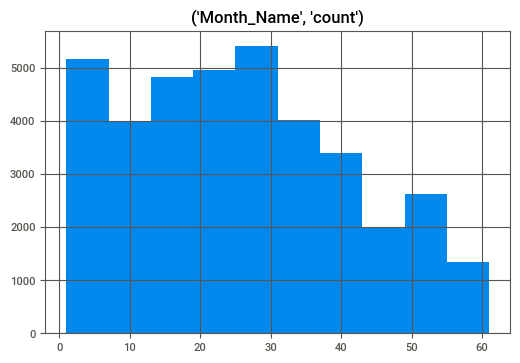

In [ ]:
reporting_periods.hist(column =('Month_Name', 'count') )

In [ ]:
## pivot reporting periods

reporting_periods_pivot = reporting_periods.pivot(index='EPAssetsId', columns='ProdType')

reporting_periods_pivot.head()

ProdPeriod  ...              Month_Name
                                    min  ...                   count
ProdType   Condensate Production (Bbls)  ... Water Production (Bbls)
EPAssetsId                               ...                        
3373                         2017-09-30  ...                    28.0
6976                         2015-11-30  ...                    48.0
6977                         2015-11-30  ...                    49.0
7129                         2018-01-31  ...                    29.0
7130                         2018-01-31  ...                    31.0

[5 rows x 15 columns]

##### Some wells have reporting periods that vary for the production types. Groupby by Well only to find out max number of reporting periods irrespective of production types. 

In [ ]:
# remove hierachical index in column by joining multindex 
reporting_periods.columns = [' '.join(col).strip() for col in reporting_periods.columns.values]

reporting_periods.head()

,EPAssetsId,ProdType,ProdPeriod min,ProdPeriod max,Month_Name count
0,3373,Production Hours,2017-08-31,2019-12-31,29
1,3373,Condensate Production (Bbls),2017-09-30,2019-12-31,28
2,3373,Water Production (Bbls),2017-09-30,2019-12-31,28
3,3373,Gas Production (MMcf),2017-08-31,2019-12-31,29
4,6976,Production Hours,2015-11-30,2019-12-31,48


In [ ]:
reporting_periods_by_well = reporting_periods.groupby(by='EPAssetsId', as_index=False).agg({'Month_Name count':'max'})
                        
reporting_periods_by_well.head()

,EPAssetsId,Month_Name count
0,3373,29
1,6976,48
2,6977,49
3,7129,29
4,7130,31


In [ ]:
reporting_periods_by_well.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10386 entries, 0 to 10385
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   EPAssetsId        10386 non-null  int64
 1   Month_Name count  10386 non-null  int64
dtypes: int64(2)
memory usage: 243.4 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dcd170c18>]],
      dtype=object)

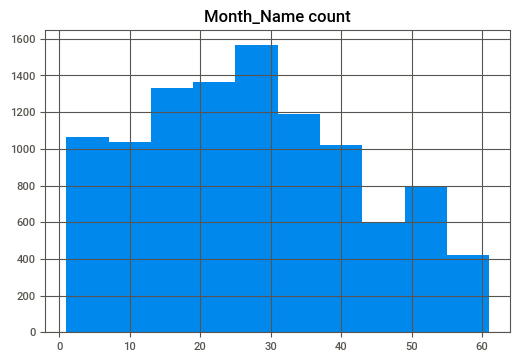

In [ ]:
reporting_periods_by_well.hist(column='Month_Name count')

In [ ]:
## create new subset of data with reporting periods equal to one (1)

reporting_periods_one = reporting_periods_by_well[reporting_periods_by_well['Month_Name count'] == 1]

reporting_periods_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 57 to 10385
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   EPAssetsId        141 non-null    int64
 1   Month_Name count  141 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [ ]:
reporting_periods_one.head()

,EPAssetsId,Month_Name count
57,37787,1
188,39222,1
202,39274,1
398,39864,1
640,40528,1


## Merge no_production_hours data with reporting_periods_by_well

In [ ]:
no_production_hrs.head(2)

ProdType,Condensate Production (Bbls),Gas Production (MMcf),Oil Production (Bbls),Production Hours,Water Production (Bbls)
EPAssetsId,,,,,
2607534,9307.01706,393.445718,NaN,NaN,NaN
2607816,133772.09538,457.835193,NaN,NaN,NaN
2611405,309.45816,85.091011,NaN,NaN,NaN
2611868,77.36454,243.326035,NaN,NaN,NaN
2611876,455.38152,92.489461,NaN,NaN,NaN


In [ ]:
# remove name of column index 
no_production_hrs.columns.name = None

no_production_hrs.head(2)

,Condensate Production (Bbls),Gas Production (MMcf),Oil Production (Bbls),Production Hours,Water Production (Bbls)
EPAssetsId,,,,,
2607534,9307.01706,393.445718,NaN,NaN,NaN
2607816,133772.09538,457.835193,NaN,NaN,NaN


In [ ]:
# flatten hierarchical columns
no_production_hrs.columns = no_production_hrs.columns.get_level_values(0)

# reassign column names 
no_production_hrs.columns = ['Condensate Production (Bbls)', 'Gas Production (MMcf)','Oil Production (Bbls)', 'Production Hours', 'Water Production (Bbls)']

# change index to column
no_production_hrs.reset_index()

no_production_hrs.head(2)

,Condensate Production (Bbls),Gas Production (MMcf),Oil Production (Bbls),Production Hours,Water Production (Bbls)
EPAssetsId,,,,,
2607534,9307.01706,393.445718,NaN,NaN,NaN
2607816,133772.09538,457.835193,NaN,NaN,NaN


In [ ]:
reporting_periods_for_wells_with_no_production_hrs = no_production_hrs.merge(reporting_periods_by_well, how='left', on='EPAssetsId', left_index=True, validate='1:1')

reporting_periods_for_wells_with_no_production_hrs.head()

,EPAssetsId,Condensate Production (Bbls),Gas Production (MMcf),Oil Production (Bbls),Production Hours,Water Production (Bbls),Month_Name count
8381,2607534,9307.01706,393.445718,NaN,NaN,NaN,10
8456,2607816,133772.09538,457.835193,NaN,NaN,NaN,7
8877,2611405,309.45816,85.091011,NaN,NaN,NaN,3
8962,2611868,77.36454,243.326035,NaN,NaN,NaN,4
8969,2611876,455.38152,92.489461,NaN,NaN,NaN,2


In [ ]:
# check distribution of values in the new table
reporting_periods_for_wells_with_no_production_hrs.describe()

,EPAssetsId,Condensate Production (Bbls),Gas Production (MMcf),Oil Production (Bbls),Production Hours,Water Production (Bbls),Month_Name count
count,1.900000e+02,95.000000,190.000000,82.000000,0.0,51.000000,190.000000
mean,2.619107e+06,30427.192196,323.006707,27954.141664,NaN,33246.328849,4.826316
std,3.019104e+03,44873.594324,397.450386,21891.758323,NaN,42307.466773,2.407295
min,2.607534e+06,7.547760,0.003531,201.902580,NaN,332.730420,1.000000
25%,2.617566e+06,586.209360,33.003446,12086.165190,NaN,5790.704370,3.000000
50%,2.619600e+06,2343.579480,161.750613,21812.082930,NaN,16318.886100,4.500000
75%,2.621278e+06,60131.431470,458.073568,41586.585150,NaN,39093.308430,7.000000
max,2.625202e+06,221135.530440,2041.555651,81804.509820,NaN,191571.583500,11.000000


In [ ]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

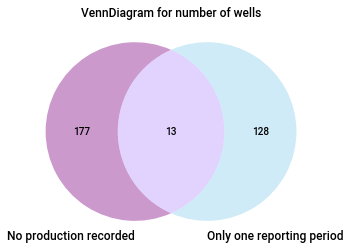

In [ ]:
#venn diagram showing intersection of EPAssetsId between Wells with no production recorded and wells with only one reporting period
venn2_unweighted([set(reporting_periods_for_wells_with_no_production_hrs['EPAssetsId']), set(reporting_periods_one['EPAssetsId'])], set_labels=['No production recorded', 'Only one reporting period'], set_colors=['purple', 'skyblue'])


plt.title('VennDiagram for number of wells')
plt.show()